1. Create a 2D scatterplot with `pages` on the x-axis and `num_ratings` on the y-axis.

In [12]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import warnings
import scipy
import scipy.stats as st
import statsmodels as sm
import matplotlib




df = pd.read_csv("preprocess_data.csv")
df.columns



Index(['Unnamed: 0', 'title', 'author', 'num_rating', 'num_reviews',
       'avg_rating', 'num_pages', 'original_publish_year', 'series',
       'minmax_norm_ratings', 'mean_norm_ratings', 'genres', 'award'],
      dtype='object')

Data cleaning before Nan

In [2]:
cleaned = df.dropna()
#cleaned


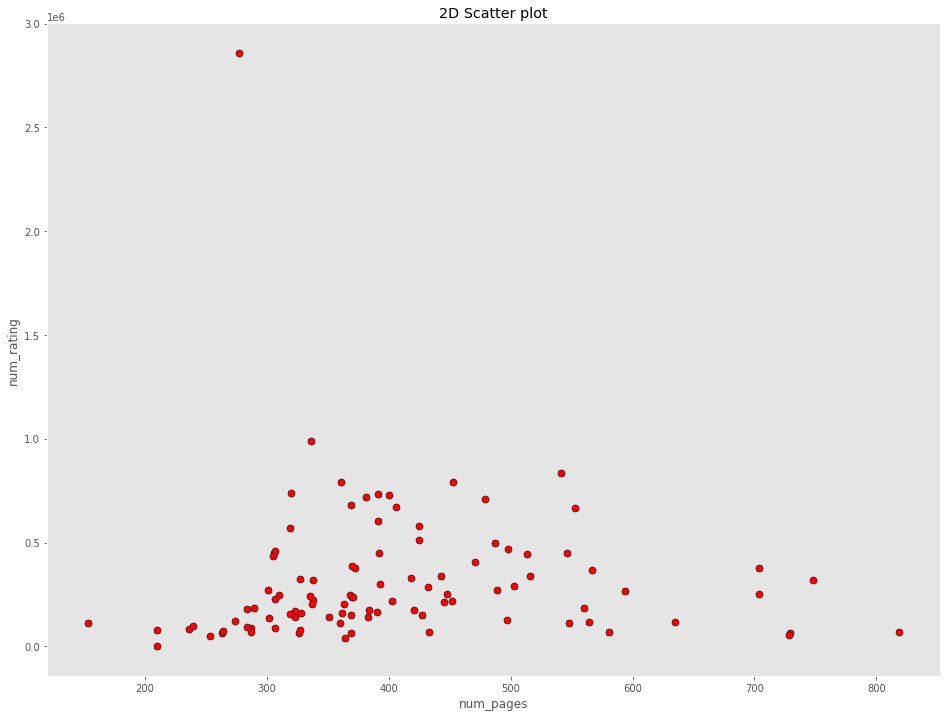

In [37]:
cleaned.plot.scatter('num_pages' ,'num_rating',color = 'r', edgecolor = 'k', s=50)
plt.xlabel('num_pages')
plt.ylabel('num_rating')
plt.title('2D Scatter plot')
#plt.legend()
plt.grid()
plt.show()

2. Can you compute numerically the correlation coefficient of these two columns?

In [4]:
cleaned['num_pages'].corr(cleaned['num_rating'])

-0.009371265301397955

3. Visualise the `avg_rating` distribution.

Text(0.5, 1.0, 'Distribution of avg_rating')

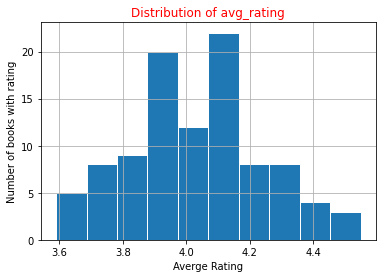

In [5]:
#hist = cleaned['avg_rating'].hist()



#x = cleaned.avg_rating
#y = len(cleaned.avg_rating)
plt.hist(cleaned.avg_rating, edgecolor = "white")
plt.xlabel("Averge Rating")
plt.ylabel("Number of books with rating")
plt.grid()
plt.title('Distribution of avg_rating', color='r')
#plt.show()


4. Visualise the `minmax_norm_rating` distribution.

In [6]:
#minmax_norm_ratings
def minmax_norm(data_column_name):
    x = data_column_name
    mean_norm_ratings=1+((x-x.min())/(x.max()-x.min()))*9
    return mean_norm_ratings
minmax_norm_ratings = minmax_norm(cleaned["avg_rating"])
#print(minmax_norm_ratings#)

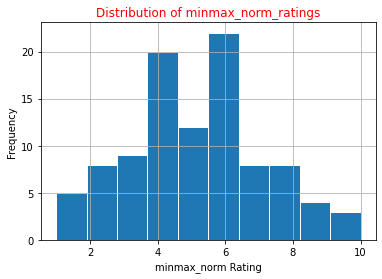

In [7]:
#Visualisation
plt.hist(minmax_norm_ratings, edgecolor = "white")
plt.xlabel("minmax_norm Rating")
plt.ylabel("Frequency")
plt.grid()
plt.title('Distribution of minmax_norm_ratings', color='r')
plt.show()



5. Visualise the `mean_norm_rating` distribution.

In [8]:
def mean_norm(data_column_name):
    x = data_column_name
    mean_norm_ratings=1+((x-x.mean())/(x.max()-x.min()))*9
    return mean_norm_ratings
mean_norm_ratings = mean_norm(cleaned["avg_rating"])
#print(mean_norm_ratings)

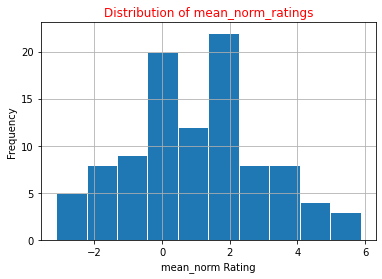

In [9]:
#Visualization
plt.hist(mean_norm_ratings, edgecolor = "white")
plt.xlabel("mean_norm Rating")
plt.ylabel("Frequency")
plt.grid()
plt.title('Distribution of mean_norm_ratings', color='r')
plt.show()

6. Create one graph that represents in the same figure both `minmax_norm_rating` and `mean_norm_rating`distributions.

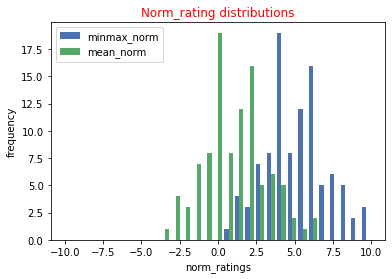

In [10]:
plt.style.use('seaborn-deep')

x = minmax_norm_ratings
y = mean_norm_ratings
bins = np.linspace(-10, 10, 30)

plt.hist([x, y], bins, label=['minmax_norm', 'mean_norm'])
plt.xlabel('norm_ratings')
plt.ylabel('frequency')
plt.title('Norm_rating distributions', color='red')
plt.legend(loc='upper left')
plt.show()

7. What is the best fit in terms of a distribution (normal, chi-squared...) to represent each of those graphs? 
    - You can use `Scipy-Stats` [Library](https://docs.scipy.org/doc/scipy/reference/stats.html) to figure out the best fitting distribution like in this [example](https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python).

Text(0, 0.5, 'Frequency')

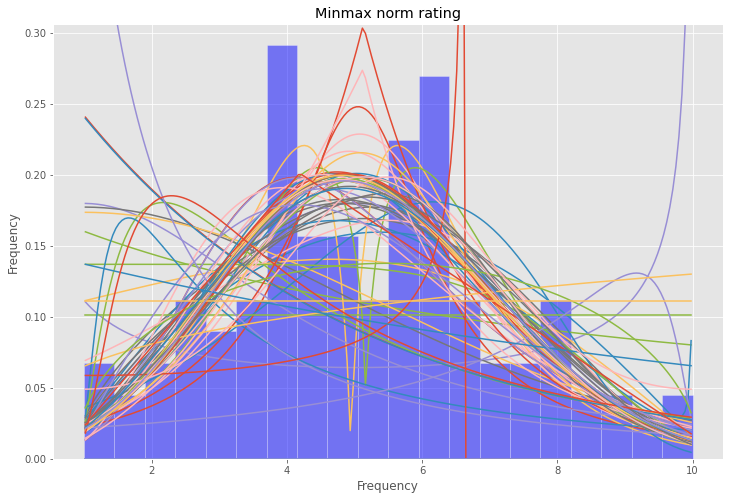

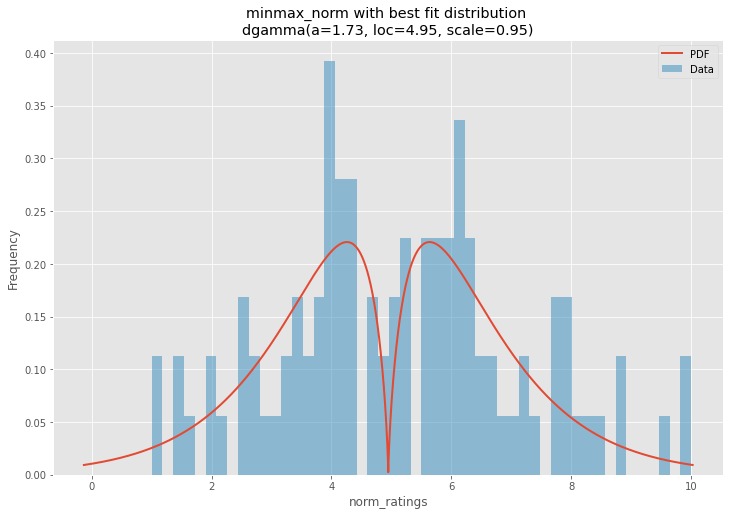

In [14]:

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        #st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = preprocess_data.csv

# Plot for comparison
plt.figure(figsize=(12,8))
#ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
ax = df.minmax_norm_ratings.hist(bins=20, alpha=0.5, density=True, color='blue', edgecolor = 'white')
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(df.minmax_norm_ratings, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Minmax norm rating')
ax.set_xlabel(u'Frequency')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
df.minmax_norm_ratings.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'minmax_norm with best fit distribution \n' + dist_str)
ax.set_xlabel(u'norm_ratings')
ax.set_ylabel('Frequency')

8. Visualize the `awards` distribution in a **boxplot** and **aggregated bars**. Decide which of these representations gives us more information and in which cases they should be used.

9. Yesterday we asked you this:
    - "Group the books by `original_publish_year` and get the mean of the `minmax_norm_ratings` of the groups."
    - Now, make a **simple plot** to visualise the ratings w.r.t. the years!

Text(0, 0.5, 'year')

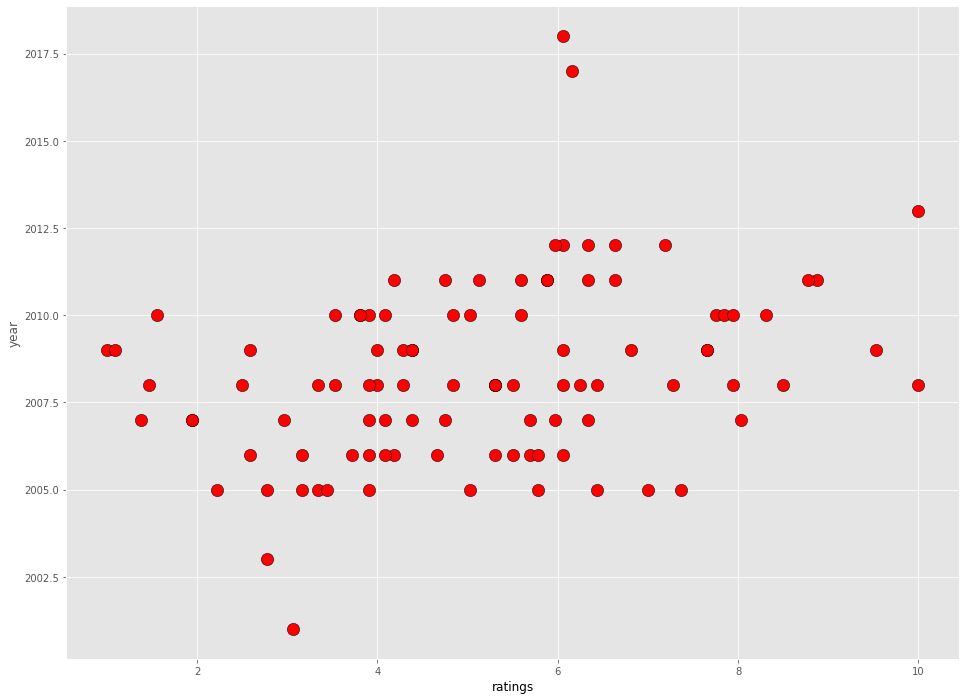

In [31]:
plt.scatter(df.minmax_norm_ratings, df.original_publish_year,color='r', edgecolor='black', s=150)
plt.xlabel('ratings',color='black')
plt.ylabel('year')


10. Make a scatterplot to represent  `minmax_norm_ratings` in function of the number of awards won by the book.
    - Is there another representation that displays this in a more clear manner?
    - Optional: Can you plot a best fit linear regression line to represent the relationship?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8aa7b630-9ed2-4356-9070-0a10a3a5f060' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>